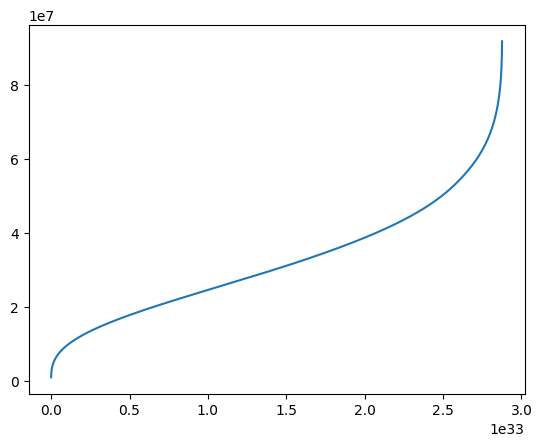

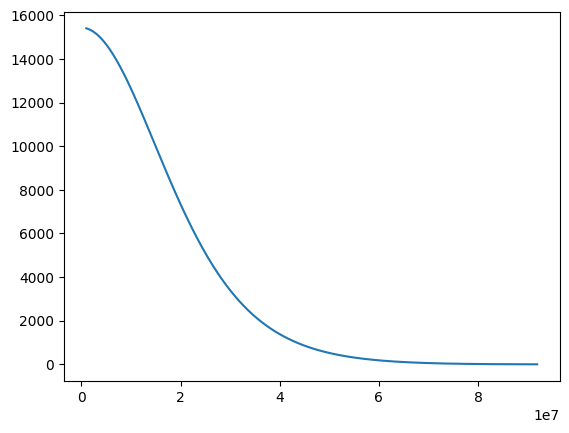

'\nstrc = [] # strcuture profile\n\nfor i in range(len(rho_o)):\n    print(rho_o[i])\n    print()\n    strc.append(White_dwarf_structure(rho_o[i]))\n\n\n#Grafico de densidad\nfig1, ax1= plt.subplots()\nfig2, ax2= plt.subplots()\nfig3, ax3= plt.subplots()\nfor i in range(len(rho_o)):\n    ax1.plot(strc[i][-3],np.log(strc[i][0]))\n    ax2.plot(strc[i][-3],np.log(strc[i][1]))\n    ax3.plot(strc[i][-3], strc[i][2])\n\nplt.show(fig1)\nplt.show(fig2)\nplt.show(fig3)\n'

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Segunda forma con las variables logaritmizadas

# Auxiliar functions of the program 
def get_initial_conditions(rho_):
    r_o = 1.0 #1.5 centimetros creó yo
    m_o = 4/3 *r_o**3 *np.pi*rho_  #
    log_m_o = np.log(m_o)
    x_o = (rho_/(B*miu_e))**(1/3)  
    P_o = A*f(x_o)

    return (r_o, m_o, log_m_o , x_o, P_o)


# Ecuaciones auxiliares
def f(x):
    return (  x*(2*x**2 -3)*(1+x**2)**(1/2) + 3*np.arcsinh(x)  )

def dfdx(x):
    return 8*x**4/(1+x**2)**(1/2)

def Rho(x):
    return B*miu_e* x**3

def dPdx(x):
    return (dfdx(x))/(A*f(x))

# Stop condition
def event(t, c_o):
    P = A*f(c_o[0])

    InC = get_initial_conditions(rho_o[i])
    #print(P/InC[-1] - n)
    condition = P/InC[-1] - n

    return condition


#Sistema de ecuacciones diferenciales a integrar
def System_2(r, c_o):    
    x, m = c_o

    dxdr = (-1)*B*miu_e*x**3 *G*m*(1+x**2)**(1/2) / (A*r**2*8*x**4)

    dmdr = 4*np.pi*r**2 * B*miu_e*x**3

    return np.array([dxdr,dmdr])

def get_structure_profile(ln_r, x, ln_m):
    # Obtenermos las variables fisicas
    rho_sol = Rho(x) # densidad
    P_sol = A*f(x)
    M_sol = np.e**(ln_m)
    r_sol = np.e**(ln_r)
    return [rho_sol, P_sol, M_sol, r_sol, ln_r, ln_m, x]

# New variables logaraized

def White_dwarf_structure(rho_):
    init_cond = get_initial_conditions(rho_)
    c_o = np.array([init_cond[3], init_cond[1]]) # Inital program conditions

    r = np.linspace(init_cond[0], 1e8 , 10000000) # In centimeters, without zero to avoid singularity #1e8
    log_r = np.log(r) 

    #integration
    event.terminal = True
    sol_2 = solve_ivp( System_2, (r[0], r[-1]), c_o, t_eval = r, method = 'RK45', events= event)

    # Sacamos los resultados de la integración numerica
    r = sol_2.t
    x = sol_2.y[0]
    m = sol_2.y[1]

    #structure_profile = get_structure_profile(ln_r, x, ln_m) 


    return r,x,m



### /////// MAIN PROGRAM \\\\\\\\ ###

# Contants
A = 6.022e22 #cgs
B = 9.74e5#cgs
G = 6.674e-8 #cgs

#Parameters
miu_e = 2 #two nucleons per electron
rho_o = np.array([3e10]) # average density of Sirius B en cgs  

# computational parameters
n = 1e-6 # limit for P(r)/Pc to stop computation 
#/ it is not much smaller because program is delayed
i=0
r,x,m = White_dwarf_structure(rho_o[i])


plt.plot(m,r)#ln_m(r)
plt.show()
plt.plot(r,x**3)#M(ln_r)
plt.show()


"""
print(len(sol[-3]), len(sol[-4]))

plt.plot(sol[3],sol[-2])#ln_m(r)
plt.show()
plt.plot(sol[4],sol[2])#M(ln_r)
plt.show()
plt.plot(sol[4],sol[-2]) #ln_m(ln_r)
plt.show()
plt.plot(sol[3], sol[2] ) #M(r)
plt.show()
plt.plot(sol[3],sol[0]) #rho(r)
plt.show()
plt.plot(sol[4],sol[0]) #rho(ln_r)
plt.show()
plt.plot(sol[3],sol[1]) #P(r)
plt.show()
plt.plot(sol[4],sol[1]) #P(ln_r)
plt.show()

"""


"""
strc = [] # strcuture profile

for i in range(len(rho_o)):
    print(rho_o[i])
    print()
    strc.append(White_dwarf_structure(rho_o[i]))


#Grafico de densidad
fig1, ax1= plt.subplots()
fig2, ax2= plt.subplots()
fig3, ax3= plt.subplots()
for i in range(len(rho_o)):
    ax1.plot(strc[i][-3],np.log(strc[i][0]))
    ax2.plot(strc[i][-3],np.log(strc[i][1]))
    ax3.plot(strc[i][-3], strc[i][2])

plt.show(fig1)
plt.show(fig2)
plt.show(fig3)
"""

#6566041
#10000000
